## Data set

As part of a study of consumer consideration of ready-to-eat cereals sponsored by Kellogg Australia, Roberts and Lattin (1991) surveyed consumers regarding their perceptions of their favorite brands of cereals. Each respondent was asked to evaluate three preferred brands on each of 25 different attributes. Respondents used a five point likert scale to indicate the extent to which each brand possessed the given attribute.  
 
For the purpose of this assignment, a subset of the data collected by Roberts and Lattin, reflecting the evaluations of the 12 most frequently cited cereal brands in the sample (in the original study, a total of 40 different brands were evaluated by 121 respondents, but the majority of brands were rated by only a small number of consumers). The 25 attributes and 12 brands are listed below: 
 
 Cereal Brand  Attributes 1-12  Attributes 13-25  All Bran  Filling  Family  Cerola Muesli  Natural  Calories  Just Right  Fibre  Plain  Kellogg’s corn falkes  Sweet  Crisp  Komplete  Easy  Regular  Nutrigrain  Salt  Sugar  Purina Muesli  Satisfying  Fruit  Rice Bubbles  Energy  Process  Special K  Fun  Quality  Sustain  Kids  Treat  Vitabrit  Soggy  Boring  Weetbix  Economical  Nutritious  Health  
 
 
In total 116 respondents provided 235 observations of the 12 selected brands.  

Refer: https://rpubs.com/ssindw/274704

Do a Principal component analysis to characterize the consideration behavior of the 12 selected brands.

## Step 1 Import the necessary modules

In [1]:
import pandas      as        pd
import numpy       as        np
import seaborn     as        sns

from   sklearn               import    preprocessing
from   sklearn.preprocessing import    StandardScaler
from   sklearn.decomposition import    PCA
import matplotlib.pyplot     as        plt
from   scipy.stats           import    shapiro
from   scipy.stats           import    normaltest
from   scipy.stats           import    bartlett
import scipy.stats           as        stats 

from   factor_analyzer.factor_analyzer import calculate_kmo
from   statsmodels.base.model          import GenericLikelihoodModel
%matplotlib inline

## Step 2: Obtain the Dataset

In [2]:
import os
os.getcwd()

'D:\\RRD\\Courseware\\ipynb files'

In [3]:
data = pd.read_csv('../data/cereal.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 26 columns):
Cereals       235 non-null object
Filling       235 non-null int64
Natural       235 non-null int64
Fibre         235 non-null int64
Sweet         235 non-null int64
Easy          235 non-null int64
Salt          235 non-null int64
Satisfying    235 non-null int64
Energy        235 non-null int64
Fun           235 non-null int64
Kids          235 non-null int64
Soggy         235 non-null int64
Economical    235 non-null int64
Health        235 non-null int64
Family        235 non-null int64
Calories      235 non-null int64
Plain         235 non-null int64
Crisp         235 non-null int64
Regular       235 non-null int64
Sugar         235 non-null int64
Fruit         235 non-null int64
Process       235 non-null int64
Quality       235 non-null int64
Treat         235 non-null int64
Boring        235 non-null int64
Nutritious    235 non-null int64
dtypes: int64(25), object(1)
memory 

In [5]:
X     = data[['Filling', 'Natural', 'Fibre', 'Sweet', 'Easy', 'Salt', 'Satisfying', 'Energy',\
               'Fun', 'Kids', 'Soggy', 'Economical', 'Health', 'Family', 'Calories', 'Plain',\
               'Crisp', 'Regular', 'Sugar', 'Fruit', 'Process', 'Quality', 'Treat', 'Boring',\
               'Nutritious']]
y     = data['Cereals']

In [6]:
data.head().T

,0,1,2,3,4
Cereals,Weetabix,SpecialK,SpecialK,CMuesli,CornFlakes
Filling,5,1,5,5,4
Natural,5,2,4,5,5
Fibre,5,2,5,5,3
Sweet,1,1,5,3,2
Easy,2,5,5,5,5
Salt,1,2,3,2,2
Satisfying,5,5,5,5,5
Energy,4,1,5,5,4
Fun,1,1,5,5,5


**Note**

In line 1, you create a data frame of independent variables by specifying the columns you need within double square bracket, []
In line 2, you create a series, y containing the dependent variable, *quality*

### Step 3 - Test the assumptions

** a) Sample size: ideally, there should be 150+ cases and there should be ratio of at least five cases for each variable (Pallant, 2010)**

** b) Correlations: there should be some correlation among the factors to be considered for PCA**

** c) Linearity: it is assumed that the relationship between the variables are linearly related**

** d) Outliers: PCA is sensitive to outliers; they should be removed.**

** a) You should have sampling adequacy, which simply means that for PCA to produce a reliable result, large enough sample sizes are required. **

In [7]:
kmo_all, kmo_model = calculate_kmo(X)

threshold = 0.6
if kmo_model >= threshold:
    print('Sample adequacy is established')
else:
    print('Sample adequacy is not established')
    
print(kmo_model)

Sample adequacy is established
0.8535216558763702


Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for PCA. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

** b) The Spearman Rank Correlation is a test of association for ordinal or interval variables. **

In [8]:
rho, pval = stats.spearmanr(X)
print(rho)

[[ 1.00000000e+00  5.24862692e-01  5.19030832e-01  1.94478502e-01
   2.48960449e-01 -2.68813685e-02  6.50322590e-01  6.21204953e-01
   2.60803293e-01  1.65343073e-01 -9.29972563e-02  8.22436619e-02
   5.26370234e-01  2.23640080e-01  4.50036661e-02 -2.76425407e-01
   1.58950193e-01  4.00543841e-01 -7.12487489e-02  2.43003928e-01
  -2.06303136e-01  4.32333695e-01  3.19311785e-01 -2.29251642e-01
   5.11673444e-01]
 [ 5.24862692e-01  1.00000000e+00  5.89505953e-01 -6.07695998e-02
   2.16880626e-01 -2.02084931e-01  4.41444315e-01  4.78021885e-01
   9.75168012e-02  6.98469070e-02  4.69853120e-02  1.33120404e-01
   6.35326144e-01  9.36592655e-02 -1.16316749e-01 -1.67815736e-01
   2.23603718e-02  3.61830296e-01 -2.63147542e-01  2.99166396e-01
  -2.63321895e-01  5.51522998e-01  1.78088635e-01 -2.20024462e-01
   6.07607027e-01]
 [ 5.19030832e-01  5.89505953e-01  1.00000000e+00 -4.06768596e-02
   1.75296139e-01 -1.74909430e-01  3.77776422e-01  4.75016736e-01
   5.53078272e-02 -7.80292668e-02 -4.7

In [9]:
col_names = ['Filling', 'Natural', 'Fibre', 'Sweet', 'Easy', 'Salt', 'Satisfying', 'Energy',\
               'Fun', 'Kids', 'Soggy', 'Economical', 'Health', 'Family', 'Calories', 'Plain',\
               'Crisp', 'Regular', 'Sugar', 'Fruit', 'Process', 'Quality', 'Treat', 'Boring',\
               'Nutritious']
cor_df  = pd.DataFrame(np.round(rho,2), columns = col_names)

In [10]:
cor_df.iloc[:,:8]

,Filling,Natural,Fibre,Sweet,Easy,Salt,Satisfying,Energy
0,1.00,0.52,0.52,0.19,0.25,-0.03,0.65,0.62
1,0.52,1.00,0.59,-0.06,0.22,-0.20,0.44,0.48
2,0.52,0.59,1.00,-0.04,0.18,-0.17,0.38,0.48
3,0.19,-0.06,-0.04,1.00,0.09,0.42,0.19,0.20
4,0.25,0.22,0.18,0.09,1.00,-0.02,0.38,0.20
5,-0.03,-0.20,-0.17,0.42,-0.02,1.00,-0.02,-0.07
6,0.65,0.44,0.38,0.19,0.38,-0.02,1.00,0.59
7,0.62,0.48,0.48,0.20,0.20,-0.07,0.59,1.00
8,0.26,0.10,0.06,0.33,0.26,0.00,0.35,0.36
9,0.17,0.07,-0.08,0.11,0.27,0.02,0.32,0.13


In [11]:
cor_df.iloc[:,8:16]

,Fun,Kids,Soggy,Economical,Health,Family,Calories,Plain
0,0.26,0.17,-0.09,0.08,0.53,0.22,0.05,-0.28
1,0.10,0.07,0.05,0.13,0.64,0.09,-0.12,-0.17
2,0.06,-0.08,-0.05,-0.02,0.66,-0.00,-0.20,-0.14
3,0.33,0.11,-0.11,-0.24,-0.10,0.06,0.46,-0.31
4,0.26,0.27,-0.05,0.12,0.21,0.27,-0.04,-0.00
5,0.00,0.02,0.00,-0.12,-0.22,-0.07,0.42,0.01
6,0.35,0.32,-0.08,0.24,0.52,0.34,0.01,-0.21
7,0.36,0.13,-0.11,0.03,0.53,0.18,0.02,-0.28
8,1.00,0.38,-0.17,0.00,0.11,0.39,0.15,-0.32
9,0.38,1.00,0.02,0.30,0.02,0.70,0.01,0.00


In [12]:
cor_df.iloc[:,16:]

,Crisp,Regular,Sugar,Fruit,Process,Quality,Treat,Boring,Nutritious
0,0.16,0.40,-0.07,0.24,-0.21,0.43,0.32,-0.23,0.51
1,0.02,0.36,-0.26,0.30,-0.26,0.55,0.18,-0.22,0.61
2,0.05,0.63,-0.18,0.28,-0.19,0.49,0.13,-0.10,0.69
3,0.24,-0.01,0.63,0.38,0.11,-0.04,0.36,-0.23,-0.03
4,0.23,0.09,-0.05,0.00,-0.01,0.19,0.18,-0.17,0.18
5,0.09,-0.16,0.57,0.03,0.28,-0.20,0.10,0.09,-0.19
6,0.27,0.32,-0.10,0.24,-0.19,0.46,0.35,-0.35,0.48
7,0.27,0.37,-0.06,0.27,-0.09,0.46,0.31,-0.28,0.51
8,0.38,0.12,0.15,0.26,-0.02,0.21,0.57,-0.33,0.17
9,0.35,-0.01,-0.03,-0.24,0.00,0.15,0.30,-0.22,0.04


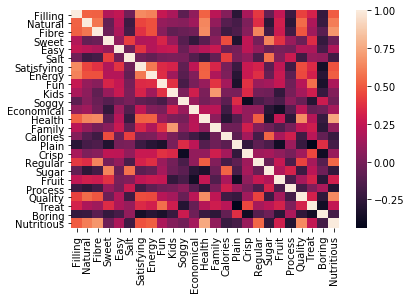

In [13]:
# plot the heatmap
sns.heatmap(rho, 
        xticklabels = col_names,
        yticklabels = col_names)

From the above he Spearman Rank Correlation  matrix we can see that all the variables value of correlation coefficient greater than 0.3 with at least one other variable. 17 variables have correlation coefficient of at least 0.5 and only 8 variables (Easy, Soggy, Economical, Plain, Crisp, Fruit, Treat, Boring) have at least 0.3.  Hence we can assume that variables are fairly correlated with each other and we can run Factor Analysis on this data. 

** c) Linearity:**

#### Perform kruskalwallis’ test for equal variances

In [14]:
test_stat, p_value = stats.mstats.kruskalwallis(X)
'''
 X.iloc[:,0], X.iloc[:,1])
 ,X.iloc[:,2], X.iloc[:,3], X.iloc[:,4],\
                                          X.iloc[:,5], X.iloc[:,6], X.iloc[:,7], X.iloc[:,8], X.iloc[:,9],\
                                          X.iloc[:,10], X.iloc[:,11], X.iloc[:,12], X.iloc[:,13], X.iloc[:,14],\
                                          X.iloc[:,15], X.iloc[:,16], X.iloc[:,17], X.iloc[:,18], X.iloc[:,19],\
                                          X.iloc[:,20], X.iloc[:,21], X.iloc[:,22], X.iloc[:,23], X.iloc[:,24])
'''
threshold = 0.5
if p_value >= threshold:
    print('Correlation matrix is an identity matrix')
else:
    print('Correlation matrix is not an identity matrix')
    
print(p_value)

Correlation matrix is not an identity matrix
2.4610827280377626e-24


Kruskal–Wallis H test was conducted in Python and it was found to be significant ( P < 0.001) . The significance of this test tells us that the correlation matrix is not an identity matrix. Hence, we assume that there is some relationship between the variable. 

** d) Outliers **

For ordinal data, there are no outliers. Hence, this test is not conducted.

In [15]:
X[X.gt(5) | X.lt(1)].sum()

Filling       0.0
Natural       0.0
Fibre         0.0
Sweet         0.0
Easy          0.0
Salt          0.0
Satisfying    0.0
Energy        0.0
Fun           0.0
Kids          0.0
Soggy         0.0
Economical    0.0
Health        0.0
Family        0.0
Calories      0.0
Plain         0.0
Crisp         0.0
Regular       0.0
Sugar         0.0
Fruit         0.0
Process       0.0
Quality       0.0
Treat         0.0
Boring        0.0
Nutritious    0.0
dtype: float64

### Step 4: Scale the data

Since the variables in the data are ordinal, we don't have to scale the data. 

### Step 5: Perform PCA
To perform PCA, we use PCA module from sklearn which we have already imported in step 1.

In [16]:
model   =  PCA()

### a. Find the number of components needed

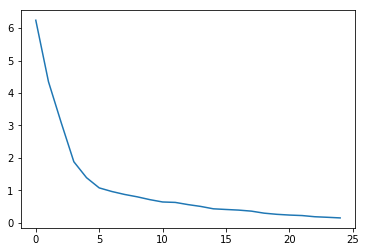

In [17]:
results =  model.fit(X)
plt.plot(results.explained_variance_)
plt.show()

The above graph indicates that a few variables can represent the majority of the information. 

###  b.Perform a Scree Plot of the Principal Components to visualize the cumulative % of variation explained by each component

In [18]:
percent_variance = np.cumsum(np.round(results.explained_variance_ratio_* 100, decimals =2))
percent_variance = list(np.round(percent_variance,2))
print(percent_variance)

[23.3, 39.53, 51.06, 58.08, 63.26, 67.27, 70.86, 74.11, 77.09, 79.74, 82.13, 84.47, 86.56, 88.44, 90.04, 91.56, 93.01, 94.34, 95.44, 96.41, 97.29, 98.11, 98.8, 99.43, 99.98]


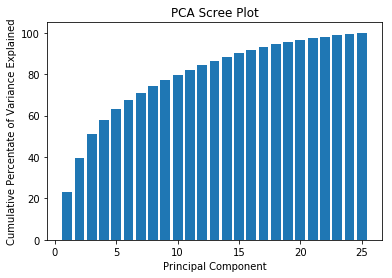

In [19]:
plt.bar(range(1, 26), percent_variance)
plt.ylabel('Cumulative Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

### Note

We observe that first 5 variables explain about 63% of the total information.

### c. Perform the PCA with the selected number of components

In [20]:
pca_5                 =  PCA(n_components = 5)

### ----------------------------------------------------------
### Compute and load the principal components into a dataframe
### -----------------------------------------------------------
pc                     =  pca_5.fit_transform(X)

### d. Form the matrix of variable loadings (i.e., a matrix whose columns contain the eigenvectors)

In [21]:
pc_df                  =  pd.DataFrame()

pc_df['PC1']           =  results.components_[0].transpose()
pc_df['PC2']           =  results.components_[1].transpose()
pc_df['PC3']           =  results.components_[2].transpose()
pc_df['PC4']           =  results.components_[3].transpose()
pc_df['PC5']           =  results.components_[4].transpose()


pc_df.index          =  col_names

In [22]:
pc_df

,PC1,PC2,PC3,PC4,PC5
Filling,-0.247735,-0.062960,0.046199,-0.159825,0.013753
Natural,-0.217417,-0.200292,0.064807,-0.115020,0.061900
Fibre,-0.241766,-0.221259,0.184499,-0.151042,-0.165883
Sweet,-0.120789,0.372499,0.138663,-0.253034,0.081622
Easy,-0.107259,0.010315,-0.086053,-0.058862,-0.033175
Salt,0.036276,0.210461,0.051158,-0.240643,-0.143412
Satisfying,-0.232068,-0.032014,-0.056754,-0.122191,0.011378
Energy,-0.250531,-0.041327,0.045963,-0.141760,-0.026140
Fun,-0.301292,0.256366,-0.148872,0.024182,0.209494
Kids,-0.152993,0.116086,-0.531686,-0.089654,0.050395


The rows in the above table, show the mathematical correlation. 



### Let us recode the data in terms of the five latent variables, PC1 through PC5.

In [23]:
new_names = [ 'Youth','Tasty','Family','Over Moist','Crunchy']

Z1         =  pca_5.fit(X)
Z          =  Z1.transform(X)

In [24]:
new_df    =  pd.DataFrame(Z, columns = new_names)

In [25]:
new_df.head(3)

,Youth,Tasty,Family,Over Moist,Crunchy
0,-0.368819,-5.391198,-1.268211,-2.152069,0.667824
1,4.530656,0.428286,-4.365594,0.911255,-1.443733
2,-4.992610,1.102228,-0.843979,-1.001949,0.342309


### Observation

We observe high values for Cereal 0 in Taste aspect, while Cereal 2 is high in Youth aspect. 